## Geometric and intensity transformations

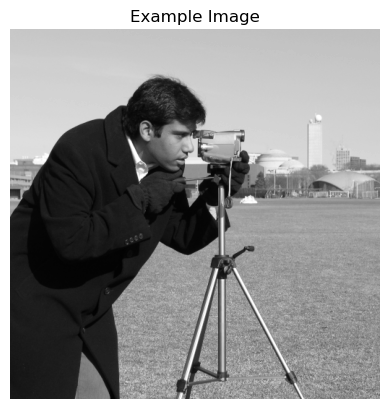

In [5]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform
import matplotlib.pyplot as plt
from skimage import data
from scipy import ndimage
f = data.camera()  


plt.imshow(f, cmap='gray')
plt.title("Example Image")
plt.axis('off')
plt.show()

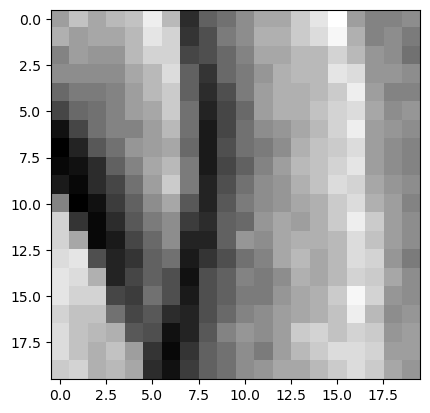

In [7]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [9]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

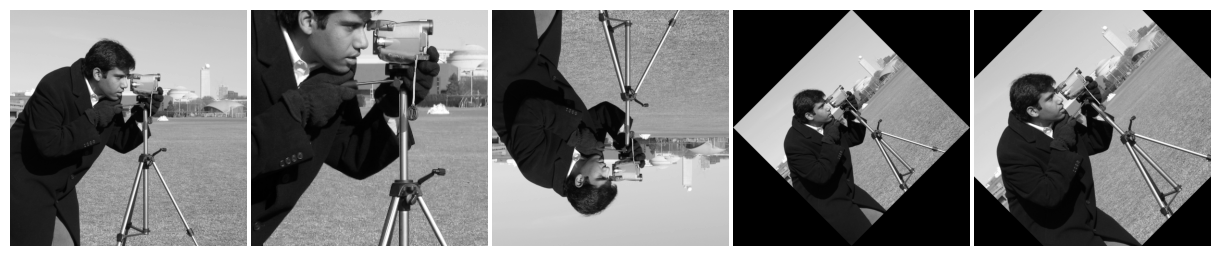

In [11]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

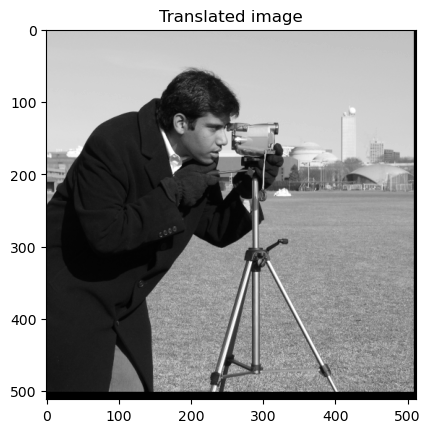

In [13]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

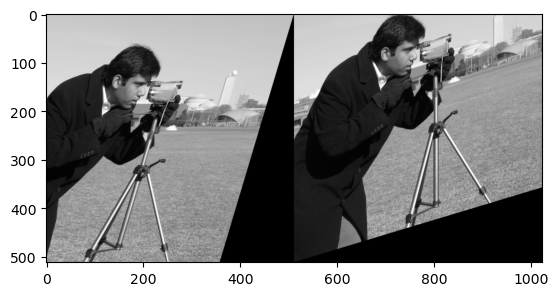

In [15]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [17]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x150e77cbbf0>

### Rescaling

In [19]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

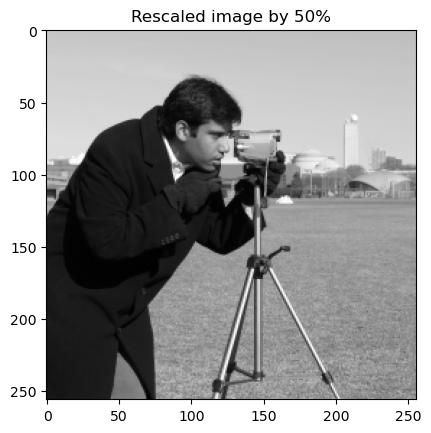

In [21]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

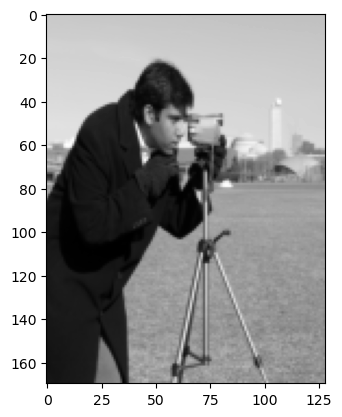

In [23]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [24]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

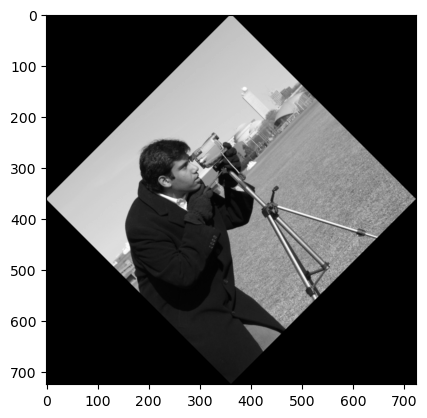

In [27]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


### Horizontal shear by 0.2 and image rescaling by 50%

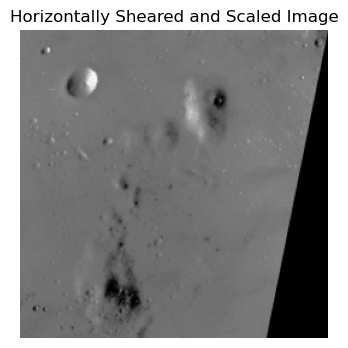

In [45]:
# Leave your answer here
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, data
from skimage.color import rgb2gray

# Load the ascent image
f = data.moon() 

# Horizontal shear by 0.2
shear_matrix = np.array([[1, 0.2, 0], [0, 1, 0], [0, 0, 1]])
shear_transform = transform.AffineTransform(matrix=shear_matrix)
sheared_f = transform.warp(f, shear_transform, order=1, preserve_range=True, mode='constant')

# Rescale by 50%
scaled_f = transform.rescale(sheared_f, 0.5, anti_aliasing=True, preserve_range=True)

# Display result
plt.figure(figsize=(8, 4))
plt.imshow(scaled_f, cmap='gray')
plt.title("Horizontally Sheared and Scaled Image")
plt.axis('off')
plt.show()


## Translate the image by 5 pixels in x-direction and 10 pixels in y-direction

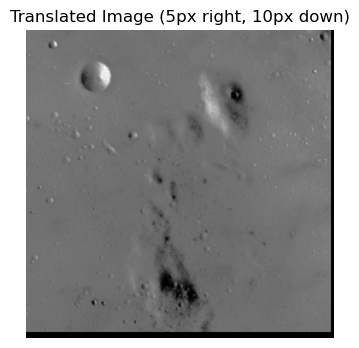

In [47]:
# Translation matrix
translation_matrix = np.array([[1, 0, 5], [0, 1, 10], [0, 0, 1]])
translation_transform = transform.AffineTransform(matrix=translation_matrix)

# Apply translation
translated_f = transform.warp(f, translation_transform, order=1, preserve_range=True, mode='constant')

# Display result
plt.figure(figsize=(8, 4))
plt.imshow(translated_f, cmap='gray')
plt.title("Translated Image (5px right, 10px down)")
plt.axis('off')
plt.show()


## Series of operations: Rotate by -45°, rescale by 1.2, and crop to 50% of the central part

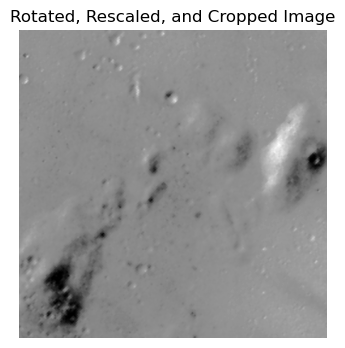

In [49]:
# Rotate by -45 degrees
rotated_f = transform.rotate(f, -45, resize=True)

# Rescale by 1.2
rescaled_f = transform.rescale(rotated_f, 1.2, anti_aliasing=True, preserve_range=True)

# Crop to the central 50%
lx, ly = rescaled_f.shape
cropped_f = rescaled_f[lx // 4: -lx // 4, ly // 4: -ly // 4]

# Display result
plt.figure(figsize=(8, 4))
plt.imshow(cropped_f, cmap='gray')
plt.title("Rotated, Rescaled, and Cropped Image")
plt.axis('off')
plt.show()


### Gamma correction and log contrast adjustment

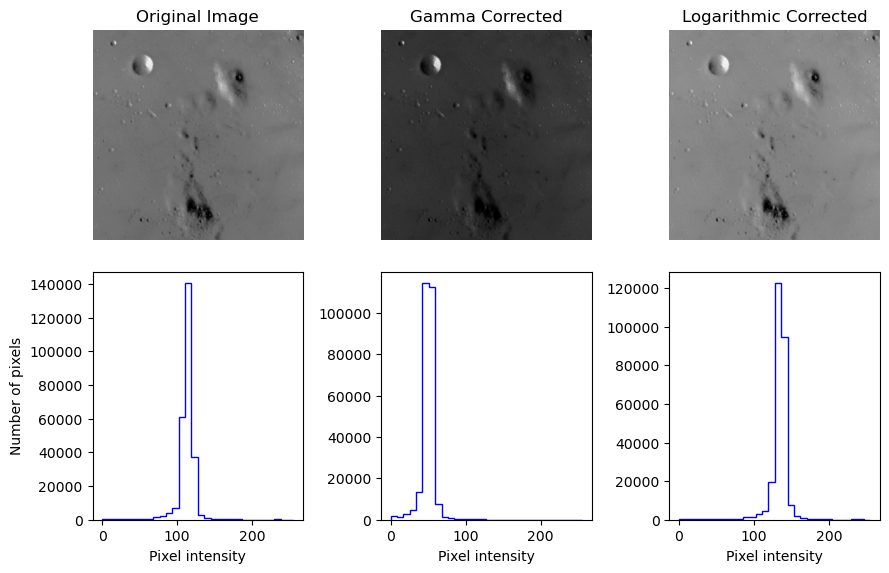

In [53]:
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

# Load a low-contrast image
im = data.moon()

fig = plt.figure(figsize=(9, 6))
axes = np.zeros((2, 3), dtype=object)  
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2)
axes[0, 2] = plt.subplot(2, 3, 3)
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_im = axes[0, :]
ax_hist = axes[1, :]

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# Logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

# __________________________
# Display original image
ax_im[0].imshow(im, cmap='gray')
ax_im[0].set_title('Original Image')
ax_im[0].axis('off')

# Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b')
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

# Display gamma-corrected image
ax_im[1].imshow(gamma_corrected, cmap='gray')
ax_im[1].set_title('Gamma Corrected')
ax_im[1].axis('off')

# Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b')
ax_hist[1].set_xlabel('Pixel intensity')

# Display logarithmic-corrected image
ax_im[2].imshow(logarithmic_corrected, cmap='gray')
ax_im[2].set_title('Logarithmic Corrected')
ax_im[2].axis('off')

# Display histogram for logarithmic-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b')
ax_hist[2].set_xlabel('Pixel intensity')

plt.tight_layout()
plt.show()


### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?


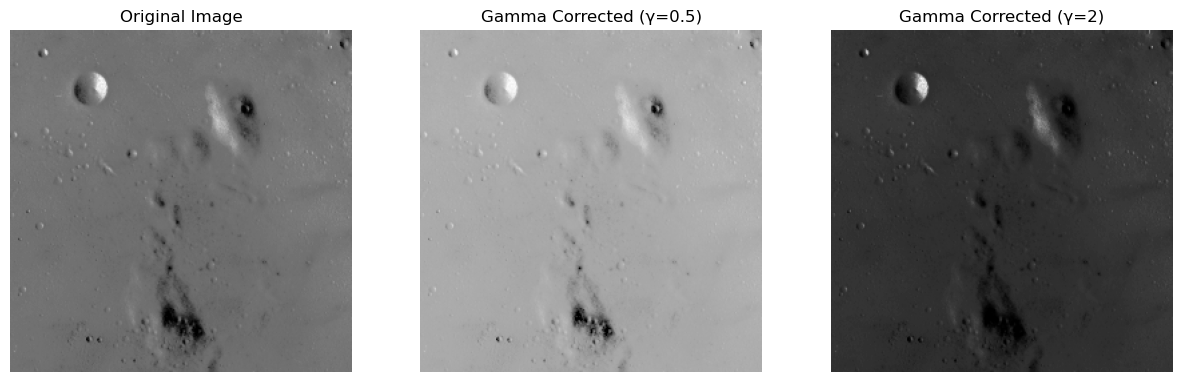

In [61]:
# Leave your answer here

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

# Load the moon image
im = data.moon()

# Gamma-correction with γ < 1
gamma_corrected_less = exposure.adjust_gamma(im, gamma=0.5)

# Gamma-correction with γ = 2
gamma_corrected_more = exposure.adjust_gamma(im, gamma=2)

# Display original and corrected images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(gamma_corrected_less, cmap='gray')
axes[1].set_title("Gamma Corrected (γ=0.5)")
axes[1].axis('off')

axes[2].imshow(gamma_corrected_more, cmap='gray')
axes[2].set_title("Gamma Corrected (γ=2)")
axes[2].axis('off')

plt.show()



Gamma-correction with γ<1:
 Brightens the darker areas of the image significantly.

Gamma-correction with γ=2:
 Suppresses lower pixel intensities, making the image darker. 